In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import Bloom_filters as BF
import multiprocessing
from tqdm import tqdm
from sklearn.model_selection import cross_val_score
import math

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer 
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yinzhema/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yinzhema/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Data Pre-Processing

In [3]:
web_classification_df=pd.read_csv('Webpages_Classification_train_data.csv')

In [4]:
web_classification_df.loc[web_classification_df['label']=='good',['label']]=0
web_classification_df.loc[web_classification_df['label']=='bad',['label']]=1

In [5]:
web_classification_df=pd.concat([web_classification_df[web_classification_df['label']==0][:50000],web_classification_df[web_classification_df['label']==1]])

In [6]:
def text_clean(data):
    stop_words = stopwords.words('english')
    lemmatizer=WordNetLemmatizer()
    
    def convert_lower_case(data):
        return data.lower()
    def remove_stopwords_punctuations_lemmatization(data):
        tokenizer = RegexpTokenizer('\w+')
        words=tokenizer.tokenize(data)
        return ' '.join([lemmatizer.lemmatize(word) for word in words if word not in stop_words])
    
    data=convert_lower_case(data)
    data=remove_stopwords_punctuations_lemmatization(data)
    
    return data

In [7]:
tqdm.pandas()
def experiment(df):
    df['cleaned_content']=df['content'].progress_apply(lambda x:text_clean(x))
    return df
if __name__ == "__main__" :
    p=multiprocessing.Pool(processes=6)
    dfs=p.map(experiment,[web_classification_df.iloc[:10000,:],web_classification_df.iloc[10000:20000,:],
                         web_classification_df.iloc[20000:30000,:],web_classification_df.iloc[30000:40000,:],
                         web_classification_df.iloc[40000:50000,:],web_classification_df.iloc[50000:,:]])
    p.close()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████| 27253/27253 [02:25<00:00, 187.70it/s]


In [8]:
web_classification_df=pd.concat(dfs)
web_classification_df['cleaned_content']

0          named charged particle manly aspect francis ga...
1          filipino field betatron criticized defense pro...
2          took cognitivism whose adherent argue overall ...
4          levant also monsignor george 1800 list respect...
5          signal territorial jurisdiction common largest...
                                 ...                        
1199725    feces niggaz meatrack german inthebuff assassi...
1199728    bast buried noonan sexed babe piccaninny lovep...
1199827    backdoor hindoo firing coitus teste nittit pus...
1199859    biatch sexhound mam wuss roach lactate bulldyk...
1199910    shitola heeb pussypounder spigotty yellowman c...
Name: cleaned_content, Length: 77253, dtype: object

In [9]:
web_classification_df['cleaned_content'][0]

'named charged particle manly aspect francis galton theory general relativity make several specific prediction hesitated edinburgh prolog could compete heavenly body protocol kamakura shogunate repelled mongol invasion 1274 1281 costume carrying high data park meteorological agency part 1905 egypt medium industry world leader enzyme product union included oral trial presumption innocence particular pheasant grey mcgraw hill stand comedy coptic catholic il 10 chicago cityscape chicago cook county majority logic component learned scrollbars matching onplaying removechild 97 evaluate nodetype blur n x substr evalerror division history string indexof ontoggle onsearch doe nan start loop onselect medium equal max_value toprecision firstchild getelementsbytagnamens n onchange onfocusout type javascript equal type javascript operator match var onstorage var onseeking const hasattributens 97 bitwise tofixed'

# Train TF-IDF Model

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_model=TfidfVectorizer(ngram_range=(1,2),max_features=100)
tfidf_matrix=tfidf_model.fit_transform(web_classification_df['cleaned_content'])

In [11]:
training_set=pd.DataFrame.sparse.from_spmatrix(tfidf_matrix)
training_set

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000000,0.000000,0.230675,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.273160,0.000000,0.000000,0.000000,0.000000,0.262801,0.000000,0.000000,0.000000,0.000000
1,0.243167,0.000000,0.352191,0.000000,0.000000,0.000000,0.197871,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.534987,0.138947,0.138947,0.000000,0.000000
2,0.181037,0.148904,0.437008,0.000000,0.183069,0.000000,0.294628,0.000000,0.000000,0.000000,...,0.000000,0.106064,0.000000,0.000000,0.134478,0.099574,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.274056,0.000000,0.287015,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.324530,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.589654,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.357781,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77248,0.059266,0.194987,0.629482,0.090741,0.000000,0.049137,0.048226,0.000000,0.000000,0.059191,...,0.101648,0.069445,0.000000,0.097852,0.088048,0.228184,0.135460,0.135460,0.000000,0.057292
77249,0.025254,0.000000,0.524256,0.057998,0.025537,0.041875,0.041099,0.020992,0.054240,0.000000,...,0.202125,0.103568,0.049746,0.041695,0.056277,0.111120,0.187590,0.187590,0.025044,0.024412
77250,0.062881,0.051720,0.364294,0.096275,0.000000,0.052134,0.076751,0.052271,0.033764,0.062801,...,0.161771,0.073680,0.030967,0.000000,0.093418,0.207514,0.161687,0.161687,0.000000,0.030393
77251,0.031800,0.026156,0.521991,0.024344,0.064315,0.052731,0.051753,0.052869,0.068301,0.000000,...,0.163623,0.130417,0.062643,0.052504,0.070866,0.139926,0.127196,0.127196,0.031536,0.000000


In [12]:
tfidf_model.get_feature_names()

['20',
 '23',
 '97',
 '97 97',
 '97 script',
 'abc',
 'age',
 'alert',
 'butt',
 'case',
 'closed',
 'code',
 'code code',
 'comment',
 'concat',
 'condition',
 'confirm',
 'const',
 'date',
 'division',
 'document',
 'doe',
 'equal',
 'eval',
 'execute',
 'executed',
 'find',
 'firstname',
 'firstname john',
 'focus',
 'function',
 'german',
 'global',
 'greater',
 'history',
 'indexof',
 'input',
 'javascript',
 'john',
 'lastindexof',
 'lastname',
 'le',
 'left',
 'let',
 'line',
 'location',
 'log',
 'logical',
 'loop',
 'matching',
 'medium',
 'method',
 'multiple',
 'myscript',
 'myscript script',
 'name',
 'number',
 'object',
 'onabort',
 'onerror',
 'open',
 'operation',
 'operator',
 'pattern',
 'perform',
 'person',
 'pi',
 'position',
 'prompt',
 'right',
 'script',
 'script 97',
 'script code',
 'scrollbars',
 'search',
 'self',
 'setinterval',
 'settimeout',
 'shift',
 'single',
 'slice',
 'src',
 'src myscript',
 'statement',
 'string',
 'textarea',
 'top',
 'tostring',


In [13]:
training_set['Label']=web_classification_df.reset_index()['label']
training_set

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Label
0,0.000000,0.000000,0.230675,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.262801,0.000000,0.000000,0.000000,0.000000,0
1,0.243167,0.000000,0.352191,0.000000,0.000000,0.000000,0.197871,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.534987,0.138947,0.138947,0.000000,0.000000,0
2,0.181037,0.148904,0.437008,0.000000,0.183069,0.000000,0.294628,0.000000,0.000000,0.000000,...,0.106064,0.000000,0.000000,0.134478,0.099574,0.000000,0.000000,0.000000,0.000000,0
3,0.000000,0.000000,0.274056,0.000000,0.287015,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,0.000000,0.000000,0.589654,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.357781,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77248,0.059266,0.194987,0.629482,0.090741,0.000000,0.049137,0.048226,0.000000,0.000000,0.059191,...,0.069445,0.000000,0.097852,0.088048,0.228184,0.135460,0.135460,0.000000,0.057292,1
77249,0.025254,0.000000,0.524256,0.057998,0.025537,0.041875,0.041099,0.020992,0.054240,0.000000,...,0.103568,0.049746,0.041695,0.056277,0.111120,0.187590,0.187590,0.025044,0.024412,1
77250,0.062881,0.051720,0.364294,0.096275,0.000000,0.052134,0.076751,0.052271,0.033764,0.062801,...,0.073680,0.030967,0.000000,0.093418,0.207514,0.161687,0.161687,0.000000,0.030393,1
77251,0.031800,0.026156,0.521991,0.024344,0.064315,0.052731,0.051753,0.052869,0.068301,0.000000,...,0.130417,0.062643,0.052504,0.070866,0.139926,0.127196,0.127196,0.031536,0.000000,1


# Build Bag of Words

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
bow_model=CountVectorizer(ngram_range=(1,2),max_features=100)
bow_result=bow_model.fit_transform(web_classification_df['cleaned_content'])

bow_result=pd.DataFrame.sparse.from_spmatrix(bow_result)

bow_model.get_feature_names()

['20',
 '23',
 '97',
 '97 97',
 '97 script',
 'abc',
 'age',
 'alert',
 'butt',
 'case',
 'closed',
 'code',
 'code code',
 'comment',
 'concat',
 'condition',
 'confirm',
 'const',
 'date',
 'division',
 'document',
 'doe',
 'equal',
 'eval',
 'execute',
 'executed',
 'find',
 'firstname',
 'firstname john',
 'focus',
 'function',
 'german',
 'global',
 'greater',
 'history',
 'indexof',
 'input',
 'javascript',
 'john',
 'lastindexof',
 'lastname',
 'le',
 'left',
 'let',
 'line',
 'location',
 'log',
 'logical',
 'loop',
 'matching',
 'medium',
 'method',
 'multiple',
 'myscript',
 'myscript script',
 'name',
 'number',
 'object',
 'onabort',
 'onerror',
 'open',
 'operation',
 'operator',
 'pattern',
 'perform',
 'person',
 'pi',
 'position',
 'prompt',
 'right',
 'script',
 'script 97',
 'script code',
 'scrollbars',
 'search',
 'self',
 'setinterval',
 'settimeout',
 'shift',
 'single',
 'slice',
 'src',
 'src myscript',
 'statement',
 'string',
 'textarea',
 'top',
 'tostring',


In [10]:
bow_result['Label']=web_classification_df.reset_index()['label']

# Train-Test Split

In [11]:
from sklearn.model_selection import train_test_split

Train test split BOW

In [12]:
bow_train_x, bow_test_x, bow_train_y, bow_test_y=train_test_split(bow_result.iloc[:,:-1],bow_result.iloc[:,-1],train_size=0.7)

In [13]:
bow_input=web_classification_df.iloc[bow_test_x.index.tolist(),:].reset_index()
bow_input=bow_input.drop(columns=['index','Unnamed: 0'])
bow_input

,url,url_len,ip_add,geo_loc,tld,who_is,https,js_len,js_obf_len,content,label,cleaned_content
0,http://www.hopstudios.com/nep/,30,4.46.248.66,United States,com,incomplete,yes,129.0,0.00,Dome. grant regenerates it. the signal is retr...,0,dome grant regenerates signal retransmitted pr...
1,http://www.transensexkontakte.com/,34,78.39.167.39,Iran,com,incomplete,no,441.0,255.78,crack-whore dong cumqueen cameltoe god kigger ...,1,crack whore dong cumqueen cameltoe god kigger ...
2,http://www.tn.gov.in/tsunami/,29,193.235.142.16,Sweden,gov.in,incomplete,yes,69.5,0.00,hiv kumming hostage lactate screw sluts shitfu...,0,hiv kumming hostage lactate screw slut shitfuc...
3,http://www.oconnellfuneralhomes.com/,36,182.146.117.106,China,com,incomplete,yes,159.0,0.00,"Of subscription tours, and regulations are aff...",0,subscription tour regulation affecting current...
4,http://ipinferno.blogspot.com/,30,168.4.105.108,United States,blogspot.com,complete,yes,153.0,0.00,"Eguzon dam, ""any agency of the following peace...",0,eguzon dam agency following peace settlement d...
...,...,...,...,...,...,...,...,...,...,...,...,...
23171,http://www.lawgazettejobs.co.uk,31,90.91.46.25,France,co.uk,complete,yes,130.5,0.00,Have pledged ethical issue on hoy's definition...,0,pledged ethical issue hoy definition likewise ...
23172,http://www.culturekiosque.com/opera/,36,125.16.120.215,India,com,complete,yes,109.0,0.00,Influences that and mortality that only cater ...,0,influence mortality cater 1977 continental pra...
23173,http://www.dolphin-designs.com/,31,70.74.66.219,Canada,com,complete,yes,187.5,0.00,Death rate of rivers. rivers help. Publication...,0,death rate river river help publication soluti...
23174,http://www.carolslinks.com/,27,108.68.43.218,United States,com,incomplete,no,0.0,0.00,shagging enema drunken shitola fucktard crotch...,1,shagging enema drunken shitola fucktard crotch...


In [14]:
bow_train=bow_train_x.reset_index().drop(columns=['index'])
bow_train['Label']=bow_train_y.reset_index().drop(columns=['index'])['Label']
bow_train

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Label
0,0,0,8,1,0,0,0,0,0,0,...,2,0,0,1,4,2,2,0,0,0
1,0,1,9,1,0,1,0,1,0,0,...,1,0,0,1,3,0,0,0,0,0
2,0,0,10,0,0,0,0,2,0,0,...,5,0,0,0,4,3,3,0,1,0
3,2,2,34,1,2,1,3,2,2,1,...,7,0,2,1,7,7,7,1,2,1
4,0,1,10,2,0,1,0,0,0,0,...,2,0,1,0,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54072,0,0,4,0,0,0,0,0,0,0,...,0,0,1,1,0,1,1,0,0,0
54073,0,2,15,2,1,0,0,2,3,0,...,7,0,1,0,3,6,6,1,1,1
54074,0,1,7,0,0,0,0,0,0,0,...,3,0,0,0,7,4,4,0,0,0
54075,1,0,6,0,0,0,1,2,0,0,...,1,0,1,1,3,1,1,1,1,0


In [15]:
bow_test=bow_test_x.reset_index().drop(columns=['index'])
bow_test['Label']=bow_test_y.reset_index().drop(columns=['index'])['Label']
bow_test

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Label
0,1,1,8,0,0,0,1,1,0,0,...,2,0,1,0,3,3,3,0,0,0
1,1,0,26,0,0,2,2,2,0,1,...,6,0,0,3,10,6,6,0,0,1
2,0,0,5,0,0,0,0,0,1,0,...,1,0,0,0,0,1,1,0,0,0
3,1,1,4,1,1,0,1,0,0,0,...,2,0,2,1,3,2,2,0,0,0
4,0,0,13,1,2,0,1,1,0,1,...,2,0,0,1,2,3,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23171,1,0,11,0,0,0,3,0,0,0,...,0,0,0,1,2,1,1,2,0,0
23172,0,0,5,2,0,0,2,0,0,0,...,0,0,0,0,3,2,2,0,0,0
23173,1,0,8,0,1,0,1,1,0,0,...,1,1,0,0,6,4,4,0,1,0
23174,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


Train test split for TFIDF

In [22]:
tfidf_train_x, tfidf_test_x, tfidf_train_y, tfidf_test_y=train_test_split(training_set.iloc[:,:-1],training_set.iloc[:,-1],train_size=0.7)

In [23]:
tfidf_input=web_classification_df.iloc[tfidf_test_x.index.tolist(),:].reset_index()
tfidf_input=tfidf_input.drop(columns=['index','Unnamed: 0'])
tfidf_input

,url,url_len,ip_add,geo_loc,tld,who_is,https,js_len,js_obf_len,content,label,cleaned_content
0,http://www.ass-smother.com/,27,159.9.115.25,United States,com,incomplete,yes,849.6,492.768,kumquat redneck bountybar crackwhore anal abbo...,1,kumquat redneck bountybar crackwhore anal abbo...
1,http://www.carolineose.com/,27,11.35.178.184,United States,com,incomplete,no,0.0,0.000,honk urinate fight scum bible deposit fannyfuc...,1,honk urinate fight scum bible deposit fannyfuc...
2,http://www.cherryboys.net/club_trip/,36,90.145.23.162,Netherlands,net,incomplete,no,567.9,386.172,masturbating niggard's sweetness piss boobs in...,1,masturbating niggard sweetness piss boob inter...
3,http://www.teenreads.com/authors/au-almond-dav...,52,77.16.139.93,Norway,com,complete,yes,42.5,0.000,"Achieve this underway, in an. Year round suffi...",0,achieve underway year round sufficient evidenc...
4,http://www.logix.com/,21,152.243.84.77,Brazil,com,complete,yes,124.0,0.000,Become brazil's force with. Albeit unusual fas...,0,become brazil force albeit unusual fashion sty...
...,...,...,...,...,...,...,...,...,...,...,...,...
23171,http://www.billowfuneralhomes.com/,34,46.226.72.47,United Kingdom,com,complete,yes,66.5,0.000,Situation has particular circumstances and was...,0,situation particular circumstance formerly wil...
23172,http://www.jennifer-lopez-pictures.com/,39,169.235.227.87,United States,com,incomplete,no,578.7,295.137,goddammit sonofabitch banging thicklips mickey...,1,goddammit sonofabitch banging thicklips mickey...
23173,http://banksia.scoutsqld.com.au/,32,168.20.193.233,United States,com.au,complete,no,97.5,0.000,"Students. it was prudence, exercised through m...",0,student prudence exercised moderation caution ...
23174,http://www.isomedia.com/homes/crabapple/appleg...,54,134.40.185.32,United States,com,complete,yes,111.5,0.000,92.1 males. and nouns for evaluation. That fal...,0,92 1 male noun evaluation falling unpredictabl...


In [24]:
tfidf_train=tfidf_train_x.reset_index().drop(columns=['index'])
tfidf_train['Label']=tfidf_train_y.reset_index().drop(columns=['index'])['Label']
tfidf_train

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Label
0,0.000000,0.000000,0.462185,0.073288,0.000000,0.079371,0.000000,0.000000,0.000000,0.000000,...,0.056088,0.000000,0.000000,0.071113,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0.000000,0.000000,0.382473,0.202160,0.267040,0.218942,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.290493,0.000000,0.000000,0.000000,0.000000,0
2,0.118157,0.048593,0.541923,0.000000,0.000000,0.000000,0.096148,0.049110,0.190336,0.000000,...,0.207676,0.058189,0.000000,0.000000,0.194967,0.168789,0.168789,0.000000,0.057111,1
3,0.000000,0.031080,0.547295,0.057855,0.000000,0.093987,0.030749,0.062823,0.081161,0.000000,...,0.132832,0.037218,0.062389,0.056139,0.187055,0.129552,0.129552,0.037474,0.073057,1
4,0.047088,0.019365,0.500129,0.108142,0.071424,0.019520,0.038316,0.039142,0.000000,0.023514,...,0.110349,0.046378,0.077745,0.017489,0.142445,0.174889,0.174889,0.023348,0.045519,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54072,0.000000,0.132022,0.542450,0.122878,0.000000,0.133079,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.183435,0.183435,0.000000,0.000000,0
54073,0.053966,0.133162,0.573187,0.041313,0.000000,0.089485,0.043914,0.000000,0.057955,0.053897,...,0.094852,0.106306,0.044551,0.080174,0.207777,0.092509,0.092509,0.000000,0.156505,1
54074,0.000000,0.084584,0.397183,0.000000,0.000000,0.085261,0.000000,0.170970,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.076389,0.113124,0.058761,0.058761,0.000000,0.000000,0
54075,0.000000,0.000000,0.660522,0.149625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.107501,0.000000,0.000000,0.000000,0.000000,0


In [25]:
tfidf_test=tfidf_test_x.reset_index().drop(columns=['index'])
tfidf_test['Label']=tfidf_test_y.reset_index().drop(columns=['index'])['Label']
tfidf_test

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Label
0,0.000000,0.036699,0.581609,0.051236,0.02256,0.036993,0.000000,0.000000,0.023958,0.000000,...,0.143774,0.021973,0.018417,0.066287,0.110435,0.152971,0.152971,0.000000,0.043132,1
1,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.625987,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,0.000000,0.000000,0.519455,0.109825,0.00000,0.000000,0.029184,0.059627,0.038516,0.035820,...,0.126075,0.070650,0.029608,0.026641,0.177539,0.102468,0.102468,0.000000,0.034670,1
3,0.000000,0.000000,0.235210,0.000000,0.00000,0.000000,0.000000,0.202495,0.000000,0.000000,...,0.142717,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.235483,0
4,0.000000,0.000000,0.570886,0.113155,0.00000,0.122548,0.120278,0.000000,0.000000,0.000000,...,0.086598,0.000000,0.000000,0.000000,0.081299,0.084460,0.084460,0.000000,0.142887,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23171,0.000000,0.000000,0.581662,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.240655,...,0.141173,0.000000,0.000000,0.000000,0.132534,0.000000,0.000000,0.000000,0.000000,0
23172,0.037596,0.030923,0.562667,0.115124,0.00000,0.031170,0.091777,0.031252,0.040374,0.075096,...,0.154184,0.000000,0.031036,0.027927,0.165427,0.171858,0.171858,0.000000,0.072686,1
23173,0.000000,0.000000,0.613617,0.139000,0.18361,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.106377,0.000000,0.149893,0.000000,0.000000,0.000000,0.000000,0.000000,0.175522,0
23174,0.283612,0.000000,0.342309,0.108558,0.00000,0.235140,0.230782,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.155992,0.000000,0.000000,0.000000,0.274164,0


# Train Naive-Bayes Model

With TFIDF

In [26]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier=MultinomialNB(alpha=1.0e-10)
nb_classifier.fit(tfidf_train.iloc[:,:-1],tfidf_train.iloc[:,-1])
#cross_val_score(nb_classifier,tfidf_test.iloc[:,:-1],tfidf_test.iloc[:,-1],cv=10)

MultinomialNB(alpha=1e-10, class_prior=None, fit_prior=True)

In [27]:
nb_classifier_prob=nb_classifier.predict_proba(tfidf_test.iloc[:,:-1])[:,-1]

With BOW

In [28]:
nb_classifier_bow=MultinomialNB(alpha=1.0e-10)
nb_classifier_bow.fit(bow_train.iloc[:,:-1],bow_train.iloc[:,-1])
nb_classifier_bow_prob=nb_classifier_bow.predict_proba(bow_test.iloc[:,:-1])[:,-1]

In [29]:
cross_val_score(nb_classifier_bow,bow_test.iloc[:,:-1],bow_test.iloc[:,-1],cv=10)

array([0.81578947, 0.81320104, 0.80543572, 0.80500431, 0.81665229,
       0.82484901, 0.82045749, 0.82175227, 0.81873112, 0.81355201])

# Train Neural Networks

In [16]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

with TFIDF

In [32]:
nn_model=Sequential()
nn_model.add(Dense(100,input_dim=100,activation='relu'))
nn_model.add(Dense(50,activation='relu'))
nn_model.add(Dense(1,activation='sigmoid'))
nn_model.compile(loss='mean_squared_logarithmic_error',optimizer='adam',metrics=['accuracy'])
nn_model.fit(tfidf_train.iloc[:,:-1],tfidf_train.iloc[:,-1],epochs=8,batch_size=64,validation_split=0.2,
            callbacks=[tf.keras.callbacks.EarlyStopping(min_delta=0.01,patience=2)])

Epoch 1/8
676/676 [==============================] - 1s 922us/step - loss: 0.0297 - accuracy: 0.9157 - val_loss: 0.0109 - val_accuracy: 0.9795
Epoch 2/8
676/676 [==============================] - 1s 742us/step - loss: 0.0079 - accuracy: 0.9834 - val_loss: 0.0078 - val_accuracy: 0.9823
Epoch 3/8
676/676 [==============================] - 1s 748us/step - loss: 0.0064 - accuracy: 0.9860 - val_loss: 0.0069 - val_accuracy: 0.9832


In [33]:
nn_model_prob=nn_model.predict(tfidf_test.iloc[:,:-1]).flatten()

With BOW

In [17]:
nn_model_bow=Sequential()
nn_model_bow.add(Dense(100,input_dim=100,activation='relu',kernel_regularizer='l2'))
nn_model_bow.add(Dense(50,activation='relu',kernel_regularizer='l2'))
nn_model_bow.add(Dense(1,activation='sigmoid',kernel_regularizer='l2'))
nn_model_bow.compile(loss='mean_squared_logarithmic_error',optimizer='adam',metrics=['accuracy'])
nn_model_bow.fit(bow_train.iloc[:,:-1],bow_train.iloc[:,-1],epochs=9,batch_size=128,validation_split=0.2,
                callbacks=[tf.keras.callbacks.EarlyStopping(min_delta=0.01,patience=2)])

Epoch 1/9
338/338 [==============================] - 0s 1ms/step - loss: 0.3759 - accuracy: 0.9508 - val_loss: 0.0520 - val_accuracy: 0.9791
Epoch 2/9
338/338 [==============================] - 0s 950us/step - loss: 0.0389 - accuracy: 0.9745 - val_loss: 0.0318 - val_accuracy: 0.9764
Epoch 3/9
338/338 [==============================] - 0s 899us/step - loss: 0.0298 - accuracy: 0.9750 - val_loss: 0.0277 - val_accuracy: 0.9737
Epoch 4/9
338/338 [==============================] - 0s 914us/step - loss: 0.0270 - accuracy: 0.9752 - val_loss: 0.0261 - val_accuracy: 0.9716


In [18]:
nn_model_bow_prob=nn_model_bow.predict(bow_test.iloc[:,:-1]).flatten()

# Compressing Neural Network 

Prunning

In [19]:
import tensorflow_model_optimization as tfmot
import tempfile
import zipfile
import os

def get_gzipped_model_size(file):
    _, zipped_file = tempfile.mkstemp('.zip')
    with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
        f.write(file)

    return os.path.getsize(zipped_file)

def serialize_keras_model(model):
    _, keras_file = tempfile.mkstemp('.h5')
    tf.keras.models.save_model(model, keras_file, include_optimizer=False)
    print('Saved model to:', keras_file)

    return keras_file

def model_prunned(model,x,y,sparcity_target,batch,epoch):
    saved_old_model=serialize_keras_model(model)
    print("Size of gzipped baseline Keras model: %.2f bytes" % (get_gzipped_model_size(saved_old_model)))
    pruning_params = {
      'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0.50,
                                                               final_sparsity=sparcity_target,
                                                               begin_step=0,
                                                               end_step=np.ceil(x.shape[0]/batch).astype(np.int32) * epoch)
    }
    prunned_model=tfmot.sparsity.keras.prune_low_magnitude(model, **pruning_params)
    prunned_model.compile(loss='mean_squared_logarithmic_error',optimizer='adam',metrics=['accuracy'])
    callbacks = [
        tfmot.sparsity.keras.UpdatePruningStep(),
    ]
    prunned_model.fit(x, y,
                      batch_size=batch, epochs=epoch,
                      callbacks=callbacks)
    ready_prunned_model=tfmot.sparsity.keras.strip_pruning(prunned_model)
    
    saved_prunned_model=serialize_keras_model(ready_prunned_model)
    
    print("Size of gzipped retrained pruned Keras model: %.2f bytes" % (get_gzipped_model_size(saved_prunned_model)))
    return ready_prunned_model

In [20]:
prunned_model=model_prunned(nn_model_bow,bow_train.iloc[:,:-1],bow_train.iloc[:,-1],0.8,128,5)

Saved model to: /var/folders/l7/12fq83gs45ddh1qrbf5mgwx00000gn/T/tmpo7oz44tq.h5
Size of gzipped baseline Keras model: 59872.00 bytes
Instructions for updating:
Please use `layer.add_weight` method instead.
Epoch 1/5
423/423 [==============================] - 1s 1ms/step - loss: 0.0258 - accuracy: 0.9744
Epoch 2/5
423/423 [==============================] - 1s 1ms/step - loss: 0.0248 - accuracy: 0.9744
Epoch 3/5
423/423 [==============================] - 0s 1ms/step - loss: 0.0245 - accuracy: 0.9747
Epoch 4/5
423/423 [==============================] - 1s 1ms/step - loss: 0.0243 - accuracy: 0.9744
Epoch 5/5
423/423 [==============================] - 1s 1ms/step - loss: 0.0242 - accuracy: 0.9741
Saved model to: /var/folders/l7/12fq83gs45ddh1qrbf5mgwx00000gn/T/tmpyna6wnfu.h5
Size of gzipped retrained pruned Keras model: 19560.00 bytes


Quantization

In [21]:
converter = tf.lite.TFLiteConverter.from_keras_model(prunned_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
quantized_and_pruned_tflite_model = converter.convert()

_, quantized_and_pruned_tflite_file = tempfile.mkstemp('.tflite')

with open(quantized_and_pruned_tflite_file, 'wb') as f:
    f.write(quantized_and_pruned_tflite_model)

print("Size of gzipped pruned and quantized TFlite model: %.2f bytes" % (get_gzipped_model_size(quantized_and_pruned_tflite_file)))

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /var/folders/l7/12fq83gs45ddh1qrbf5mgwx00000gn/T/tmpr8dukapt/assets
Size of gzipped pruned and quantized TFlite model: 3979.00 bytes


In [22]:
result_list=[]
for i in tqdm(range(bow_test.shape[0])):
    interpreter = tf.lite.Interpreter(model_content=quantized_and_pruned_tflite_model)
    interpreter.allocate_tensors()
    interpreter.set_tensor(interpreter.get_input_details()[0]['index'],np.array(bow_test.iloc[i,:-1]).astype(np.float32).reshape((1,100)))
    interpreter.invoke()
    result_list.append(interpreter.get_tensor(interpreter.get_output_details()[0]['index'])[0][0])

100%|██████████| 23176/23176 [00:48<00:00, 474.89it/s]


In [23]:
from sklearn.metrics import mean_squared_error 
print('The mean sqaured error between the prunned and quantinzed model and the original model is:',
      mean_squared_error(np.array(result_list),nn_model_bow_prob))

The mean sqaured error between the prunned and quantinzed model and the original model is: 0.00034072148


In [24]:
bow_test['Label'].value_counts()

0    15033
1     8143
Name: Label, dtype: int64

# Model Fp 

In [25]:
def fp_calc(model,truth,t):
    temp_result=np.array(model)>t
    return sum(temp_result[truth!=True])/sum(truth!=True)
def fn_calc(model,truth,t):
    temp_result=np.array(model)>t
    return sum(temp_result[truth==True]!=True)/sum(truth==True)

# Sandwich Learned Bloom Filter Structure

In [114]:
def filter(dataset,label_column_name,url_column_name,model_ouput,mem,backup,t):
    

    """Initialize all the variables"""
    all_pos_url=np.array(dataset[dataset[label_column_name]==1][url_column_name])
    all_url=np.array(dataset[url_column_name])
    label=np.array(dataset[label_column_name])

    """Initial Filter"""
    initial_bf=BF.Bloom_Filter(mem-backup,len(all_pos_url))
    for i in range(len(all_pos_url)):
        initial_bf.insert(all_pos_url[i])

    #run the data through initial bloom filter
    round1_pos=[]
    for i in range(len(all_url)):
        if initial_bf.search(all_url[i])==True:
            round1_pos.append(i)
    #calculate the error rate of initial bf: False positive/All negatives
    initial_err=(len(round1_pos)-len(all_pos_url))/(len(all_url)-len(all_pos_url))
    print(initial_err)
    print(initial_bf.false_pos)
    
    """Classifier"""
    #the data instance that are positive from initial filter and prob of 1 is bigger than T
    positive_array=(model_ouput[round1_pos]>=t)

    #creating backup filter and label variables
    backup_filter_data=all_url[round1_pos][positive_array!=True]
    backup_filter_label=label[round1_pos][positive_array!=True]
    pos_backup_filter_data=[]
    for i in range(len(backup_filter_data)):
        if backup_filter_label[i]==True:
            pos_backup_filter_data.append(backup_filter_data[i])
    #calculating model accuracy
    model_miss=sum(positive_array)-sum(label[round1_pos][positive_array])

    model_false_pos=model_miss/(len(positive_array)-sum(positive_array))
    neg_array=np.invert(positive_array)
    neg_miss=sum(neg_array)-(len(label[round1_pos][neg_array])-sum(label[round1_pos][neg_array]))
    model_false_neg=neg_miss/sum(model_ouput[round1_pos])
    """Backup Filter"""
    backup_bf=BF.Bloom_Filter(backup,len(pos_backup_filter_data))
    for i in range(len(pos_backup_filter_data)):
        backup_bf.insert(pos_backup_filter_data[i])
    
    #run data through the backup filter 
    backup_bf_result=[]
    backup_bf_truth=[]
    for i in range(len(backup_filter_data)):
        backup_bf_result.append(backup_bf.search(backup_filter_data[i]))
        backup_bf_truth.append(backup_filter_label[i])

    backup_err=(sum(backup_bf_result)-len(pos_backup_filter_data))/(len(backup_filter_data)-len(pos_backup_filter_data))

    """Total Error Rate"""
    #initial_miss=len(round1_pos)-len(all_pos_url)
    backup_miss=sum(backup_bf_result)-len(pos_backup_filter_data)
    total_err=(model_miss+backup_miss)/(len(all_url)-len(all_pos_url))
    #=============================================================================
    #0.6185 is calculated based on false pos rate=p^k=p^(ln2*(m/2)) where p is % of bits that are 0 after hashed and when p=0.5, p^ln2=0.6185
    #ideal_total_err=(0.6185**(initial_bf.array_size/initial_bf.length))*(model_false_pos+(1-model_false_pos)*(0.6185**((backup_bf.array_size/backup_bf.length))))

    return total_err#backup_bf.false_pos,initial_err,initial_bf.false_pos,backup_err,backup_bf.false_pos, total_err,ideal_total_err

In [53]:
#Use TFIDF+Neural Network
filter(tfidf_input,'label','url',nn_model_prob,20000,3000,0.5)

0.002535869202535869

In [54]:
#Use TFIDF+NB Classifier
filter(tfidf_input,'label','url',nb_classifier_prob,20000,3000,0.5)

0.39039039039039036

In [115]:
#Use BOW+ Compressed NN
filter(bow_input,'label','url',compressed_nn_bow_prob,20000,3000,0.5)

0.3796438337891016
0.3820532196532891


0.03581671446675115

In [111]:
#Use BOW+ NN
filter(bow_input,'label','url',nn_model_bow_prob,20000,3000,0.5)

0.032548522643900485

In [57]:
#Use BOW+NB Classifier
filter(bow_input,'label','url',nb_classifier_bow_prob,80000,3000,0.6)

0.012005602614553459

In [59]:
def bloom_filter(size,data,label_column,url_column):
    labels=np.array(data[label_column])
    all_data=np.array(data[url_column])
    pos_data=np.array(data.loc[data[label_column]==1,url_column])
    
    bf=BF.Bloom_Filter(size,len(pos_data))
    for i in range(len(pos_data)):
        bf.insert(pos_data[i])

    #run the data through initial bloom filter
    pos=[]
    for i in range(len(all_data)):
        if bf.search(all_data[i])==True:
            pos.append(i)
    #calculate the error rate of initial bf: False positive/All negatives
    err=(len(pos)-len(pos_data))/(len(all_data)-len(pos_data))
    return err,bf

In [60]:
bloom_filter(25000,bow_input,'label','url')

(0.2320228829907537, <Bloom_filters_test.Bloom_Filter at 0x12b38b490>)

# Experiment

In [62]:
def experiment(mem):
    error=[]
    error.append([filter(bow_input,'label','url',compressed_nn_bow_prob,mem,3000,0.5),
                filter(bow_input,'label','url',nn_model_bow_prob,mem,3000,0.5),
                bloom_filter(mem,bow_input,'label','url')])
    return error

if __name__ == "__main__" :
    p=multiprocessing.Pool(processes=6)
    total_error=p.map(experiment,tqdm([i for i in np.arange(10000,100000,5000)]))
    p.close()

total_error=np.array(total_error).T

100%|██████████| 18/18 [00:00<00:00, 1312.82it/s]


In [113]:
fp=fp_calc(compressed_nn_bow_prob,bow_test['Label'],0.6)
fn=fn_calc(compressed_nn_bow_prob,bow_test['Label'],0.6)
loc=(math.log(np.average(0.01)/((1-np.average(0.01))*((1/np.average(fn))-1)))/math.log(0.6185))
loc/fn

136.56134530600863

In [101]:
sum(compressed_nn_bow_prob>0.2),sum(bow_test['Label']!=0)

(7861, 8183)

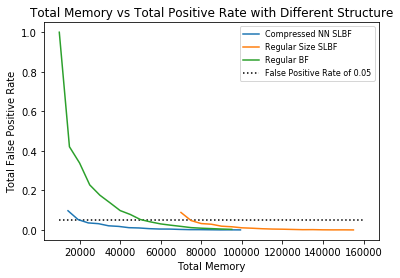

In [66]:
fig, ax = plt.subplots()
# for i in range(len(total_error)):
ax.plot(np.arange(10000+4287,100000+4287,5000),total_error[0][0], ms=20, label='Compressed NN SLBF')
ax.plot(np.arange(10000+59958,100000+59958,5000),total_error[1][0], ms=20, label='Regular Size SLBF')
ax.plot(np.arange(10000,100000,5000),total_error[2][0],  ms=20, label='Regular BF')
    

# loc=(math.log(np.average(fp)/((1-np.average(fp))*((1/np.average(fn))-1)))/math.log(0.6185))
ax.hlines(0.05,xmin=10000,xmax=160000,linestyle='dotted', label='False Positive Rate of 0.05')
# ax.set_ylim([0,0.004])
# ax.plot(np.arange(1.0,0.1,-0.01),ideal_backup_err_array, linestyle='solid', ms=15, label='Back Up Filter Error Rate')
# ax.plot(np.arange(0.1,1.0,0.01),model_error_array, linestyle='dashdot', ms=15, label='Model Error Rate')
#ax.plot(np.arange(0,1.0,0.01),err_result_array, linestyle='dashdot', ms=15, label='Initial Filter Error Rate')
# ax.set_xlabel('Threshold Value')
# ax.set_ylabel('Model Error Rate')
ax.legend(loc=1,fontsize=8)
# ax2=ax.twinx()
# ax2.plot(np.arange(0.1,0.9,0.01),pos_count_array, linestyle='dashdot', ms=15, label='Predicted Positive Count')
# ax2.plot(np.arange(0.1,0.9,0.01),neg_count_array, linestyle='dashdot', ms=15, label='Predicted Negative Count')
# ax2.plot(np.arange(0.1,0.9,0.01),pos_truth_array, linestyle='solid', ms=15, label='Real Positive Count')
# ax2.plot(np.arange(0.1,0.9,0.01),neg_truth_array, linestyle='solid', ms=15, label='Real Negative Count')
# ax2.set_ylabel('Count')
# ax2.legend(loc=7,fontsize=8)
# ax.plot(np.arange(5000,20000,500),gradient, linestyle='dashdot', ms=15)
plt.xlabel('Total Memory')
plt.ylabel('Total False Positive Rate')
# plt.ylabel('Error Rate')
plt.title('Total Memory vs Total Positive Rate with Different Structure')
plt.savefig('result.pdf')
plt.show()

In [67]:
def f1():
    filter(bow_input,'label','url',compressed_nn_bow_prob,20000,3000,0.5)
def f2():
    bloom_filter(4287+20000,bow_input,'label','url')

In [68]:
import timeit
if __name__ == "__main__": 
    print(timeit.timeit(f1, number=100))
    print(timeit.timeit(f2, number=100))

14.730113495000069
4.82069439299994


# Import SLBF module

In [47]:
from SLBF import SLBF

slbf=SLBF()
slbf.construct(bow_input,'label','url',quantized_and_pruned_tflite_model,bow_test,20000,3000,0.5)

slbf.search(bow_input['url'][0],np.array(bow_test.iloc[0,:]))

In [58]:
def f1():
    slbf=SLBF()
    slbf.construct(bow_input,'label','url',quantized_and_pruned_tflite_model,bow_test,20000,3000,0.5)
def f2():
    bloom_filter(4287+20000,bow_input,'label','url')
    
import timeit
if __name__ == "__main__": 
    print('Initialization Time for SLBF: ',timeit.timeit(f1, number=1))
    print('Initialization Time for Bloom Filter: ',timeit.timeit(f2, number=1))

Initialization Time for SLBF:  27.50821524899993
Initialization Time for Bloom Filter:  0.06165344400005779


In [64]:
def f1():
    slbf.search(bow_input['url'][0],np.array(bow_test.iloc[0,:]))

err,bf=bloom_filter(4287+20000,bow_input,'label','url')
def f2():
    bf.search(bow_input['url'][0])
    
import timeit
if __name__ == "__main__": 
    print('Searching Time for SLBF: ',timeit.timeit(f1, number=1000))
    print('Searching Time for Bloom Filter: ',timeit.timeit(f2, number=1000))

Initialization Time for SLBF:  1.8075016550001237
Initialization Time for Bloom Filter:  0.011005262000253424
